In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime



In [56]:
df = pd.read_csv(r"C:\Users\hp\Downloads\flight_dataset.csv")
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [60]:
df.describe(include = 'all')

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683,10683,10683,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
unique,12,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,4537,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,NaN,NaN,NaN,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,NaN,NaN,NaN,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000


In [62]:
df = pd.get_dummies(df, columns=['Airline','Source','Destination'], drop_first=True)



In [22]:
df.drop(['Year'], axis=1, inplace=True)


In [64]:
df['Duration_total'] = df['Duration_hours'] * 60 + df['Duration_min']


In [66]:
df.drop(['Duration_hours','Duration_min'], axis=1, inplace=True)


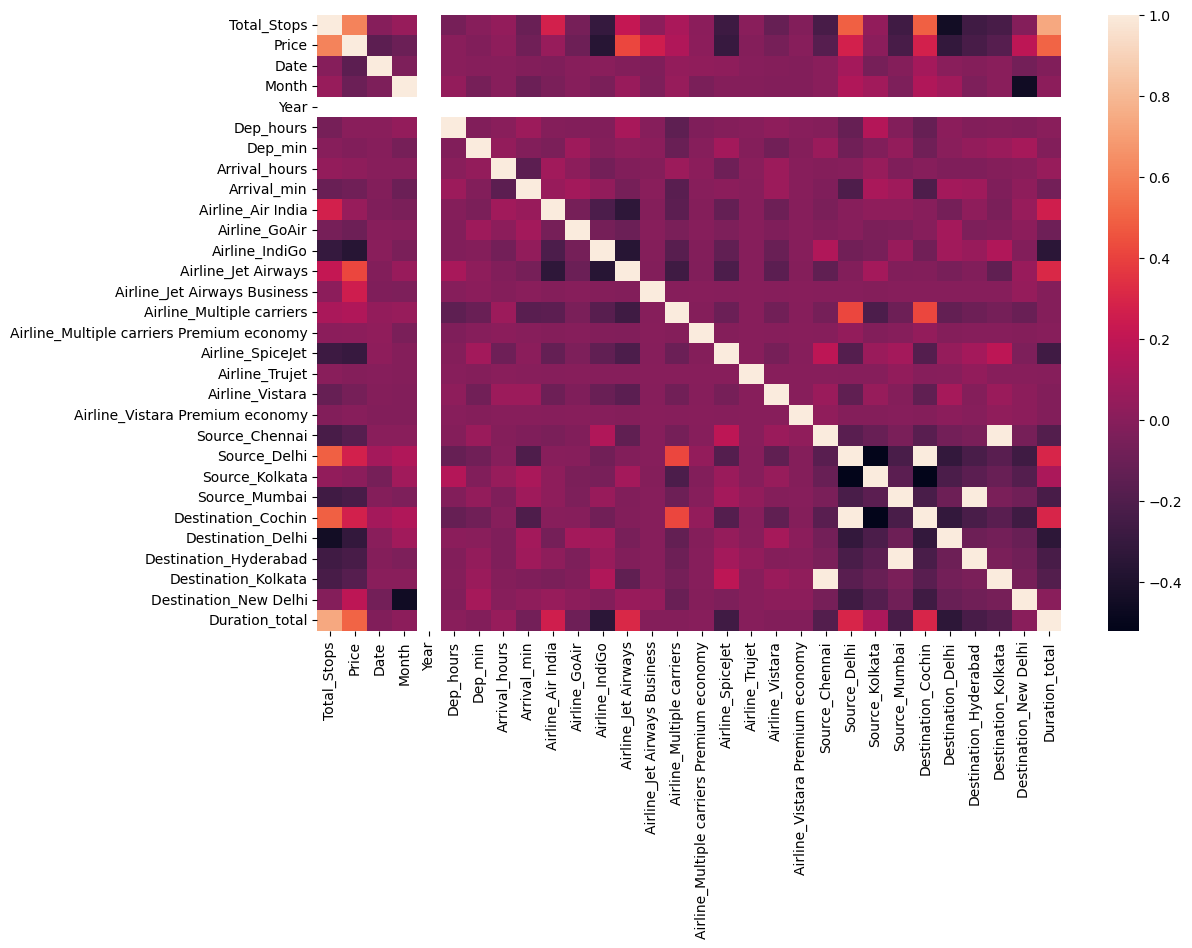

In [68]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False)
plt.show()


In [70]:

y = df['Price']        # target
X = df.drop('Price', axis=1)   # all other cols except price



In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

<Axes: >

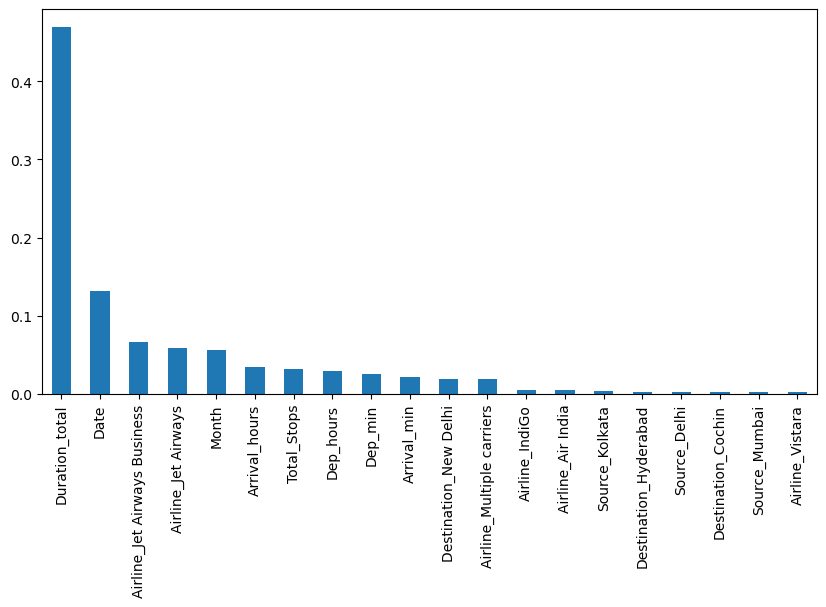

In [76]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,5))


In [78]:
model

RandomForestRegressor(random_state=42)

In [80]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.1)
xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# RandomForest
y_pred_rf = model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = (mean_squared_error(y_test, y_pred_rf))**0.5

print("RandomForest MAE:", mae_rf)
print("RandomForest RMSE:", rmse_rf)

# XGBoost
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = (mean_squared_error(y_test, y_pred_xgb))**0.5

print("\nXGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)


RandomForest MAE: 1178.7343705562494
RandomForest RMSE: 2015.0960952517062

XGBoost MAE: 1146.3770921606297
XGBoost RMSE: 1750.1793853948739


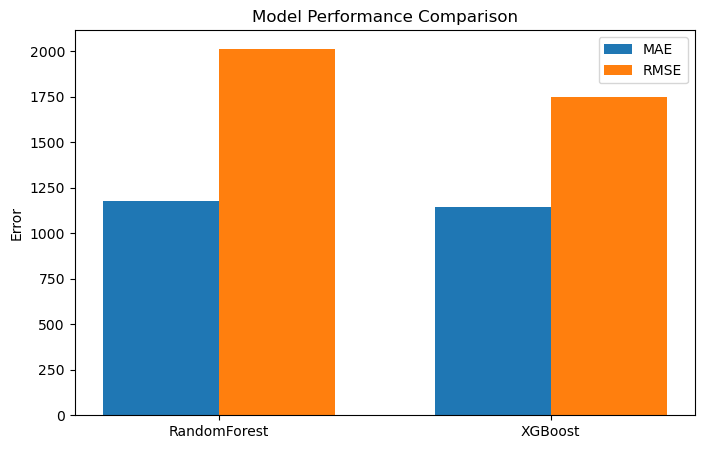

In [84]:
models = ['RandomForest', 'XGBoost']
mae_values = [mae_rf, mae_xgb]
rmse_values = [rmse_rf, rmse_xgb]

x = np.arange(len(models))  # for labeling locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

ax.set_ylabel('Error')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [99]:
from lightgbm import LGBMRegressor

# Train
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb.predict(X_test)

# Evaluate
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb)**0.5

print("LightGBM MAE :", mae_lgb)
print("LightGBM RMSE:", rmse_lgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 24
[LightGBM] [Info] Start training from score 9074.827873
LightGBM MAE : 1258.9725603251495
LightGBM RMSE: 1922.3096149708103
